In [12]:
using MultiPoly
using Interact
using ProfileView

In [22]:
reload("SpatialFields")

INFO: Recompiling stale cache file /home/rdeits/.julia/lib/v0.4/SpatialFields.ji for module SpatialFields.


In [95]:
import SoftRobots
reload("SoftRobots")

INFO: Recompiling stale cache file /home/rdeits/.julia/lib/v0.4/SoftRobots.ji for module SoftRobots.


In [98]:
world = SoftRobots.World3D()
world_state = Dict{SoftRobots.Object, SoftRobots.ObjectState}()

robots = []
for j = 1:1
    robot, robot_state = SoftRobots.blob(num_nodes=50, k=100)
    push!(robots, robot)
    for i = 1:length(robot_state.positions)
        robot_state.positions[i] += SoftRobots.Point(0., 0, 1.*j)
    end
    push!(world.objects, robot)
    world_state[robot] = robot_state
end

x, y, z = generators(MPoly{Float64}, :x, :y, :z)
terrain = SoftRobots.FixedObject()
terrain_state = SoftRobots.FixedObjectState(0 + (0.0x^2  + 0.0y^2 + 1z))
push!(world.objects, terrain)
world_state[terrain] = terrain_state

gl = [SoftRobots.LCMGLClient("robot$(i)") for i in 1:length(robots)]
history = SoftRobots.simulate(world, world_state, 0:0.001:0.003, 
draw_callback=(world, world_state) -> map(i -> SoftRobots.draw(gl[i], robots[i], world_state[robots[i]]), 1:length(robots)))
Profile.clear()
@time @profile history = SoftRobots.simulate(world, world_state, 0:0.001:1, 
draw_callback=(world, world_state) -> map(i -> SoftRobots.draw(gl[i], robots[i], world_state[robots[i]]), 1:length(robots)))
# ProfileView.view()
nothing


  4.201283 seconds (33.39 M allocations: 1.389 GB, 12.53% gc time)


In [99]:
@manipulate for i = 1:length(history)
    for j = 1:length(robots)
        SoftRobots.draw(gl[j], robots[j], history[i][2][robots[j]])
    end
end

Interact.Slider{Int64}(Signal{Int64}(500, nactions=0),"i",500,1:1000,true)

nothing

In [103]:
history[2][2][robots[1]].barrier

SpatialFields.HermiteRadialField{3,Float64}([NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN  …  NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN],50-elementArray{FixedSizeArrays.Point{3,Float64},1}:
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,NaN)
 Point(NaN,NaN,Na

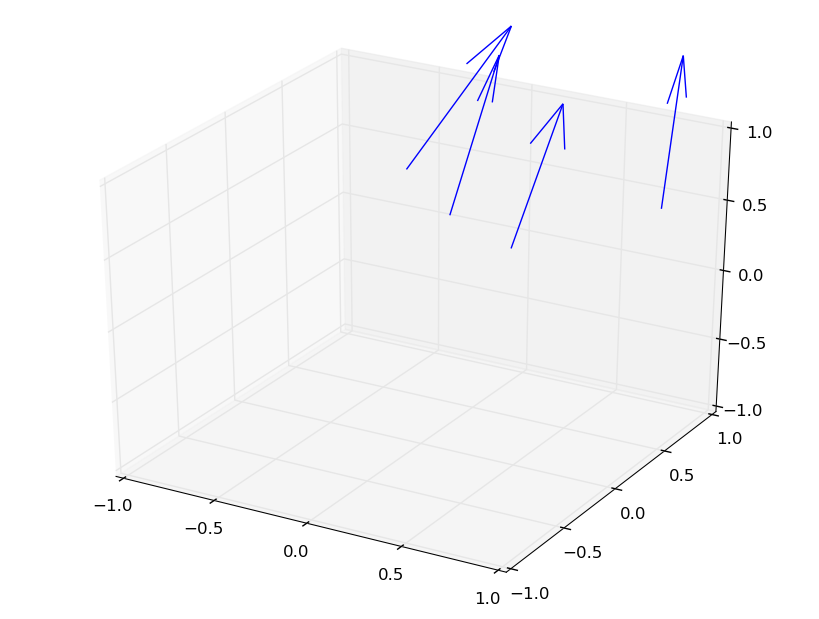

(-1,1)

In [80]:
ax = Axes3D(figure())
ax[:quiver]([p[1] for p in points], [p[2] for p in points], [p[3] for p in points], [n[1] for n in normals], [n[2] for n in normals],
    [n[3] for n in normals])
xlim([-1,1])
ylim([-1,1])
zlim([-1,1])

In [88]:
boundary_mesh = SoftRobots.HomogenousMesh(SoftRobots.SignedDistanceField(
x -> SoftRobots.evaluate(barrier, x), HyperRectangle(Vec(0., 0., 0.), Vec(4., 4, 4))))

HomogenousMesh(
    vertices: 8211xFixedSizeArrays.Point{3,Float64},     faces: 16052xGeometryTypes.Face{3,Int64,0}, )


In [91]:
SoftRobots.draw(boundary_mesh)

In [94]:
vertices(boundary_mesh)[1:100]

100-element Array{FixedSizeArrays.Point{3,Float64},1}:
 Point(10.0,15.0,15.168104636456832)                            
 Point(23.49107539192256,27.49107539192256,12.0)                
 Point(35.15524413774139,30.155244137741388,10.15524413774139)  
 Point(30.0,24.518153580557186,12.0)                            
 Point(22.244367929114734,31.0,11.244367929114734)              
 Point(17.202251509674984,28.0,12.202251509674984)              
 Point(5.52038566981234,10.0,15.52038566981234)                 
 Point(30.803370126527252,25.0,11.803370126527254)              
 Point(19.148816241763058,32.0,11.148816241763056)              
 Point(8.936363924069033,33.0,10.936363924069033)               
 Point(14.200904450348844,24.0,13.200904450348844)              
 Point(35.0,38.0,8.303524704875068)                             
 Point(29.0,4.628941623959591,14.62894162395959)                
 ⋮                                                              
 Point(33.80878516100382,16.8087851